# 计算机视觉纳米学位项目

## 实战项目：图像标注

---

Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO)  数据集是用于场景理解的一个大型数据集。 该数据集通常用于训练并对目标检测进行基准测试、分割和标注生成算法。

![Sample Dog Output](images/coco-examples.jpg)

你可以在 [该网站](http://cocodataset.org/#home) 或在 [该研究论文](https://arxiv.org/pdf/1405.0312.pdf)中查阅有关该数据集的更多信息。

在这个 notebook 中，你将要对此数据集进行研究，从而为该实战项目做准备。

## Step 1: 初始化 COCO API

首先，我们要把将用于获取数据的 [COCO API](https://github.com/cocodataset/cocoapi) 初始化。

In [27]:
import oss2
from PIL import Image
import io
import oss2
import PIL
import torch

def get_remote_image(path):

    # 阿里云主账号AccessKey拥有所有API的访问权限，风险很高。强烈建议您创建并使用RAM账号进行API访问或日常运维，请登录 https://ram.console.aliyun.com 创建RAM账号。
    auth = oss2.Auth('LTAI4FgpMbd76YabWG9j5opY', '1rlDy0j0RFxLYgnpB17UVh2KuWCE0G')
    # Endpoint以杭州为例，其它Region请按实际情况填写。
    bucket = oss2.Bucket(auth, 'http://oss-cn-shanghai-internal.aliyuncs.com', 'imageforhzx')

    #img_str = bucket.get_object('cocoapi/images/test2014/COCO_test2014_000000000001.jpg')
    img_str = bucket.get_object(path)

    img_buf = io.BytesIO()
    img_buf.write(img_str.read())
    img_buf.seek(0)
    img = Image.open(img_buf).convert('RGB')
    img_buf.close()
    
    return img

def get_remote_file(path):
    # 阿里云主账号AccessKey拥有所有API的访问权限，风险很高。强烈建议您创建并使用RAM账号进行API访问或日常运维，请登录 https://ram.console.aliyun.com 创建RAM账号。
    auth = oss2.Auth('LTAI4FgpMbd76YabWG9j5opY', '1rlDy0j0RFxLYgnpB17UVh2KuWCE0G')
    # Endpoint以杭州为例，其它Region请按实际情况填写。
    bucket = oss2.Bucket(auth, 'http://oss-cn-shanghai-internal.aliyuncs.com', 'imageforhzx')
    file = bucket.get_object(path)
    
    return file

In [17]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '/opt/cocoapi'
dataType = 'val2014'
#instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
instances_annFile = 'annotations/instances_{}.json'.format(dataType)
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
#captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
captions_annFile = 'annotations/captions_{}.json'.format(dataType)
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=6.55s)
creating index...
index created!
loading annotations into memory...
Done (t=0.40s)
creating index...
index created!


## Step 2: 绘制样本图像

接下来，我们要从数据集中随机选择一张图像，并为其绘图，以及五个相应的标注。 每次运行下面的代码单元格时，都会选择不同的图像。

在这个项目中，你将使用这个数据集来训练你自己的模型，使其生成图像标注！

In [34]:
import numpy as np
#import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
#print(url)
file_name = img['file_name']


In [35]:
image_dir = 'cocoapi/images/'

path = os.path.join(image_dir,dataType, file_name)
path

'cocoapi/images/val2014/COCO_val2014_000000429246.jpg'

In [38]:
os.path.join('', path)

'cocoapi/images/val2014/COCO_val2014_000000429246.jpg'

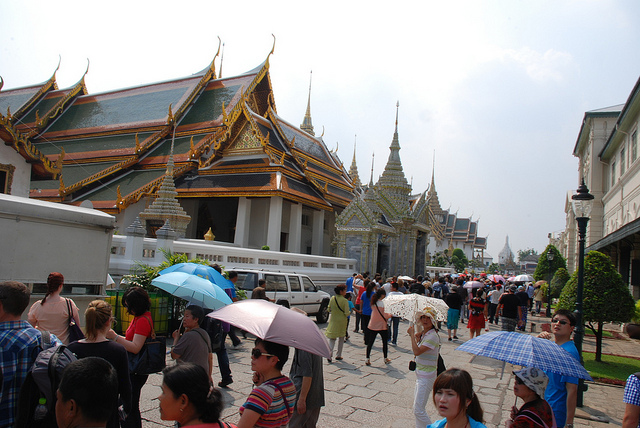

In [36]:
image = get_remote_image(path)
image

In [37]:


# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
####

A crowd of people walking on a sidewalk while holding umbrellas.
a sidewalk filled with a large crowd of people, some of them holding onto umbrellas 
People outside in front of buildings with umbrellas.
Large group of people with umbrellas at outdoor event.
Tourists with umbrellas visit a temple in Taiwan.


## Step 3: 接下来的任务！

在这个项目中，你要使用图像标注对数据集来训练CNN-RNN模型，从而使其自动由标注生成图像。 在接下来的一个 notebook  (**1_Preliminaries-zh.ipynb**) 中，你将了解更多关于如何设计这种架构的内容。

![Image Captioning CNN-RNN model](images/encoder-decoder.png)